# How many tosses do we need to obtain the first head?

The following exercise is proposed by Larry Wasserman in his _All of Statistics_: 
* A fair coin is tossed until a head is obtained. What is the expected number of tosses that will be required?

Let us perform some simulations to test and visualize the theoretical result. Firstly, let us impor the necessary libraries.

In [1]:
import sys
import os

from pathlib import Path
from math import sqrt

# add parent directory to path
library_path = os.path.abspath('..')
if library_path not in sys.path:
    sys.path.append(library_path)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from prob_simulations.first_head_utils import simulate_coin_tosses_until_head, fair_coin_detailed_analysis
# Set random seed for reproducibility
np.random.seed(42)

For a first approach let us run four rounds of experiments.

In [2]:
# Run simulation with different numbers of experiments
num_experiments = [100, 1000, 10000, 100000]
results = {}

for n in num_experiments:
    tosses_list = [simulate_coin_tosses_until_head() for _ in range(n)]
    mean_tosses = np.mean(tosses_list)
    std_tosses = np.std(tosses_list, ddof=1)  # Sample standard deviation
    
    results[n] = {
        'tosses_list': tosses_list,
        'mean': mean_tosses,
        'std': std_tosses
    }
    
    print(f"Number of experiments: {n:,}")
    print(f"Expected number of tosses: {mean_tosses:.4f}")
    print(f"Standard deviation: {std_tosses:.4f}")
    print(f"Theoretical expectation: 2.0")
    print(f"Theoretical standard deviation: {sqrt(2.0):.4f}")
    print("-" * 40)

Number of experiments: 100
Expected number of tosses: 2.0400
Standard deviation: 1.3993
Theoretical expectation: 2.0
Theoretical standard deviation: 1.4142
----------------------------------------
Number of experiments: 1,000
Expected number of tosses: 1.9650
Standard deviation: 1.3688
Theoretical expectation: 2.0
Theoretical standard deviation: 1.4142
----------------------------------------
Number of experiments: 10,000
Expected number of tosses: 1.9972
Standard deviation: 1.4012
Theoretical expectation: 2.0
Theoretical standard deviation: 1.4142
----------------------------------------
Number of experiments: 100,000
Expected number of tosses: 1.9961
Standard deviation: 1.4133
Theoretical expectation: 2.0
Theoretical standard deviation: 1.4142
----------------------------------------


It is easy to see that when the number of experiments increases the sample mean and standard deviations approach the theoretical values.

Now, this problem brings another interesting fact from probability modeling. The problem at hand ask for the number of repetitions until the first success of Bernoulli trials: which is the definition of the Geometric Distribution.

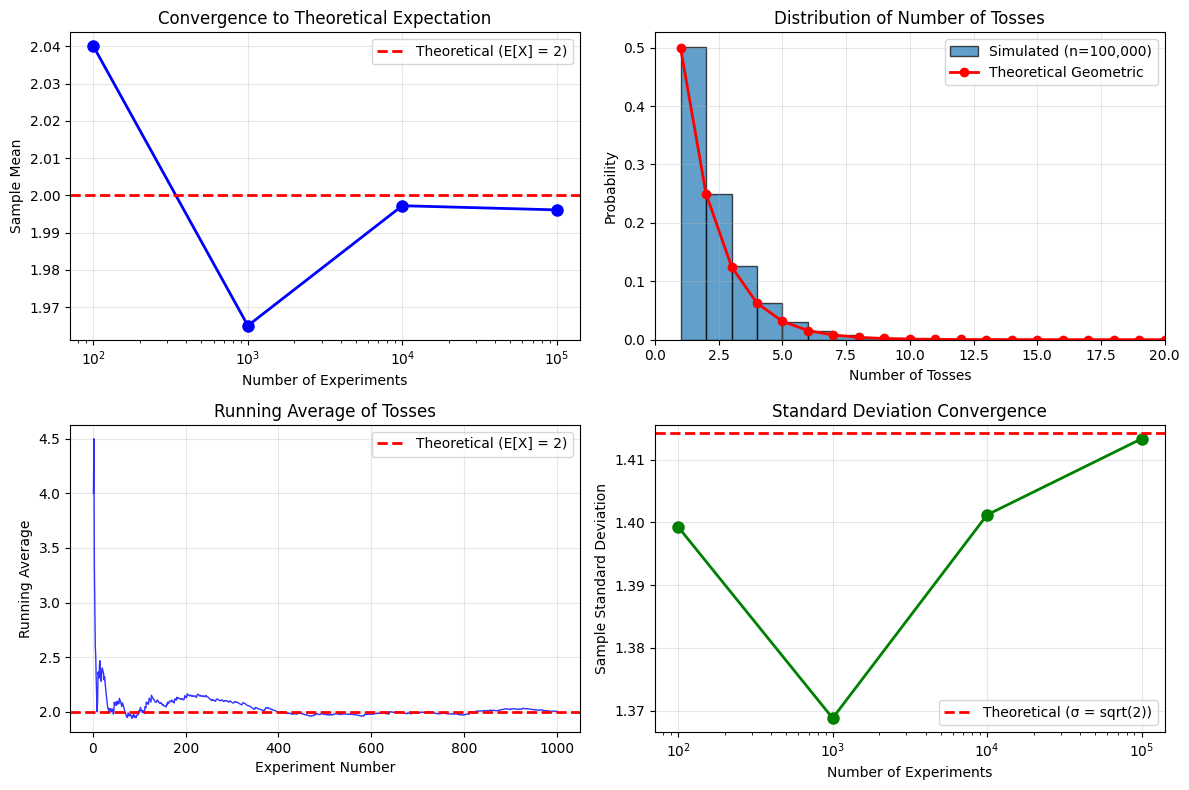

In [3]:
# Visualize the convergence to the theoretical expectation
plt.figure(figsize=(12, 8))

# Plot 1: Convergence of mean
plt.subplot(2, 2, 1)
means = [results[n]['mean'] for n in num_experiments]
plt.semilogx(num_experiments, means, 'bo-', linewidth=2, markersize=8)
plt.axhline(y=2, color='r', linestyle='--', linewidth=2, label='Theoretical (E[X] = 2)')
plt.xlabel('Number of Experiments')
plt.ylabel('Sample Mean')
plt.title('Convergence to Theoretical Expectation')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Distribution for largest sample
plt.subplot(2, 2, 2)
largest_sample = results[max(num_experiments)]['tosses_list']
plt.hist(largest_sample, bins=range(1, max(largest_sample)+2), density=True, alpha=0.7, 
         edgecolor='black', label=f'Simulated (n={max(num_experiments):,})')

# Theoretical geometric distribution
x_theoretical = range(1, 21)
theoretical_prob = [(0.5)**(k-1) * 0.5 for k in x_theoretical]
plt.plot(x_theoretical, theoretical_prob, 'ro-', linewidth=2, markersize=6, 
         label='Theoretical Geometric')

plt.xlabel('Number of Tosses')
plt.ylabel('Probability')
plt.title('Distribution of Number of Tosses')
plt.legend()
plt.xlim(0, 20)
plt.grid(True, alpha=0.3)

# Plot 3: Sample trajectories
plt.subplot(2, 2, 3)
sample_size = 1000
sample_tosses = [simulate_coin_tosses_until_head() for _ in range(sample_size)]
cumulative_mean = np.cumsum(sample_tosses) / np.arange(1, sample_size + 1)

plt.plot(range(1, sample_size + 1), cumulative_mean, 'b-', linewidth=1, alpha=0.8)
plt.axhline(y=2, color='r', linestyle='--', linewidth=2, label='Theoretical (E[X] = 2)')
plt.xlabel('Experiment Number')
plt.ylabel('Running Average')
plt.title('Running Average of Tosses')
plt.legend()
plt.grid(True, alpha=0.3)

from math import sqrt
# Plot 4: Standard deviation convergence
plt.subplot(2, 2, 4)
stds = [results[n]['std'] for n in num_experiments]
plt.semilogx(num_experiments, stds, 'go-', linewidth=2, markersize=8)
plt.axhline(y=sqrt(2), color='r', linestyle='--', linewidth=2, label='Theoretical (σ = sqrt(2))')
plt.xlabel('Number of Experiments')
plt.ylabel('Sample Standard Deviation')
plt.title('Standard Deviation Convergence')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Theoretical Analysis

For a fair coin (p = 0.5), the number of tosses required to get the first head follows a **geometric distribution**.

If X is the number of tosses required:
- **Expected value**: E[X] = 1/p = 1/0.5 = 2
- **Variance**: Var(X) = (1-p)/p² = 0.5/(0.5)² = 2  
- **Standard deviation**: σ = √2 ≈ 1.414

The probability mass function is: P(X = k) = (1-p)^(k-1) × p = (0.5)^(k-1) × 0.5

In [ ]:
# Run detailed analysis
simulation_results, summary_table = fair_coin_detailed_analysis()

Simulation Results (n = 50,000 experiments)
               Metric  Theoretical  Simulated  Difference
0                Mean       2.0000     2.0009      0.0009
1            Variance       2.0000     2.0059      0.0059
2  Standard Deviation       1.4142     1.4163      0.0021

Top 10 most frequent outcomes:
----------------------------------------
1 tosses: 0.5012 (theoretical: 0.5000)
2 tosses: 0.2482 (theoretical: 0.2500)
3 tosses: 0.1253 (theoretical: 0.1250)
4 tosses: 0.0621 (theoretical: 0.0625)
5 tosses: 0.0315 (theoretical: 0.0312)
6 tosses: 0.0161 (theoretical: 0.0156)
7 tosses: 0.0080 (theoretical: 0.0078)
8 tosses: 0.0040 (theoretical: 0.0039)
9 tosses: 0.0019 (theoretical: 0.0020)
10 tosses: 0.0011 (theoretical: 0.0010)


## Unfair Coin Analysis

Now let's study the effect of using unfair coins with different probabilities of getting heads.

In [6]:
def analyze_unfair_coin(p, n_experiments=1000000, show_details=True):
    """
    Analyze an unfair coin with probability p of getting heads.
    
    Parameters:
    p (float): Probability of getting heads (0 < p < 1)
    n_experiments (int): Number of simulation experiments to run
    show_details (bool): Whether to print detailed results
    
    Returns:
    dict: Results containing simulation statistics and theoretical values
    """
    
    # Theoretical values for geometric distribution
    theoretical_mean = 1 / p
    theoretical_var = (1 - p) / (p ** 2)
    theoretical_std = np.sqrt(theoretical_var)
    
    # Run simulation
    tosses_results = [simulate_coin_tosses_until_head(p) for _ in range(n_experiments)]
    
    # Calculate sample statistics
    sample_mean = np.mean(tosses_results)
    sample_var = np.var(tosses_results, ddof=1)
    sample_std = np.std(tosses_results, ddof=1)
    
    # Create results dictionary
    results = {
        'p': p,
        'n_experiments': n_experiments,
        'tosses_results': tosses_results,
        'theoretical': {
            'mean': theoretical_mean,
            'variance': theoretical_var,
            'std': theoretical_std
        },
        'sample': {
            'mean': sample_mean,
            'variance': sample_var,
            'std': sample_std
        }
    }
    
    if show_details:
        print(f"Unfair Coin Analysis (p = {p:.3f})")
        print("=" * 50)
        print(f"Number of experiments: {n_experiments:,}")
        print()
        print("Theoretical vs Sample Statistics:")
        print(f"Mean:     {theoretical_mean:.4f} vs {sample_mean:.4f}")
        print(f"Variance: {theoretical_var:.4f} vs {sample_var:.4f}")
        print(f"Std Dev:  {theoretical_std:.4f} vs {sample_std:.4f}")
        print()
        
        # Show probability distribution for first few outcomes
        unique, counts = np.unique(tosses_results, return_counts=True)
        frequencies = counts / len(tosses_results)
        
        print("First 8 outcomes (simulated vs theoretical):")
        for i in range(min(8, len(unique))):
            k = unique[i]
            theoretical_prob = ((1-p)**(k-1)) * p
            print(f"{k} tosses: {frequencies[i]:.4f} vs {theoretical_prob:.4f}")
    
    return results

In [7]:
# Test different unfair coins
unfair_probabilities = [0.1, 0.25, 0.3, 0.7, 0.8, 0.9]
unfair_results = {}

print("Comparing Different Unfair Coins")
print("=" * 60)

for p in unfair_probabilities:
    print(f"\nCoin with p = {p:.1f}:")
    print("-" * 30)
    unfair_results[p] = analyze_unfair_coin(p, n_experiments=5000, show_details=False)
    
    # Print summary
    theo_mean = unfair_results[p]['theoretical']['mean']
    sample_mean = unfair_results[p]['sample']['mean']
    print(f"Expected tosses: {theo_mean:.2f} (theoretical) vs {sample_mean:.2f} (simulated)")
    print(f"Difference: {abs(theo_mean - sample_mean):.4f}")
    
print(f"\nNote: Fair coin (p = 0.5) has expected value of {1/0.5:.1f} tosses")

Comparing Different Unfair Coins

Coin with p = 0.1:
------------------------------
Expected tosses: 10.00 (theoretical) vs 9.93 (simulated)
Difference: 0.0714

Coin with p = 0.2:
------------------------------
Expected tosses: 4.00 (theoretical) vs 3.98 (simulated)
Difference: 0.0232

Coin with p = 0.3:
------------------------------
Expected tosses: 4.00 (theoretical) vs 3.98 (simulated)
Difference: 0.0232

Coin with p = 0.3:
------------------------------
Expected tosses: 3.33 (theoretical) vs 3.37 (simulated)
Difference: 0.0373

Coin with p = 0.7:
------------------------------
Expected tosses: 1.43 (theoretical) vs 1.44 (simulated)
Difference: 0.0162

Coin with p = 0.8:
------------------------------
Expected tosses: 1.25 (theoretical) vs 1.25 (simulated)
Difference: 0.0032

Coin with p = 0.9:
------------------------------
Expected tosses: 1.11 (theoretical) vs 1.10 (simulated)
Difference: 0.0079

Note: Fair coin (p = 0.5) has expected value of 2.0 tosses
Expected tosses: 3.33 (t

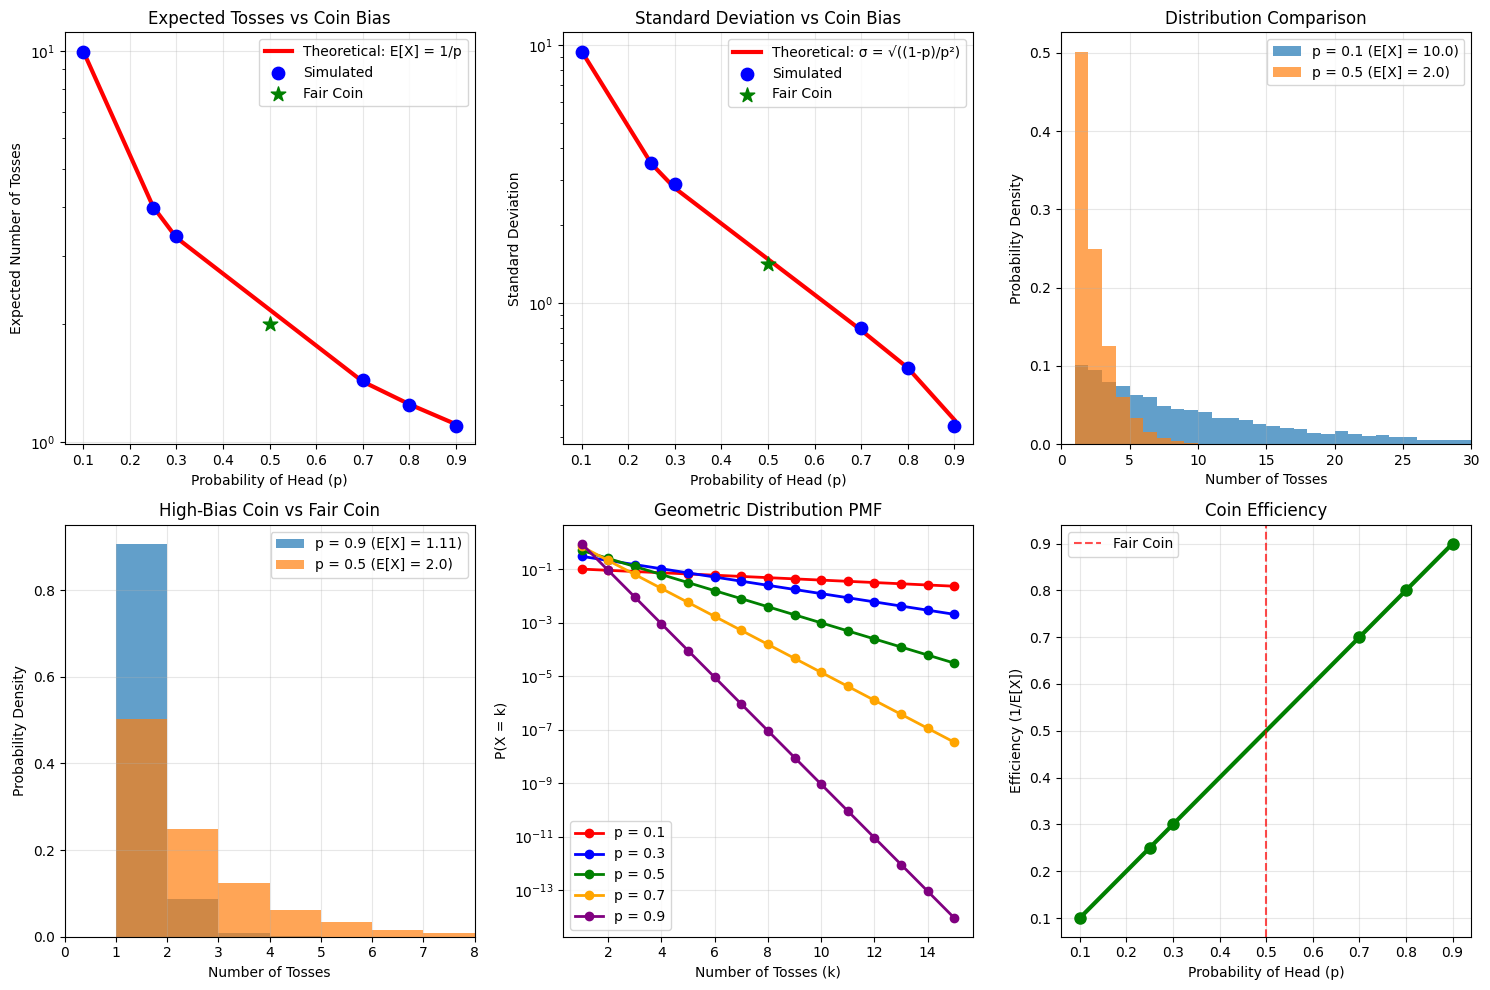

In [8]:
# Visualize the relationship between p and expected number of tosses
plt.figure(figsize=(15, 10))

# Plot 1: Expected number of tosses vs probability
plt.subplot(2, 3, 1)
p_values = list(unfair_results.keys())
theoretical_means = [unfair_results[p]['theoretical']['mean'] for p in p_values]
sample_means = [unfair_results[p]['sample']['mean'] for p in p_values]

plt.plot(p_values, theoretical_means, 'r-', linewidth=3, label='Theoretical: E[X] = 1/p')
plt.scatter(p_values, sample_means, color='blue', s=80, label='Simulated', zorder=5)

# Add fair coin point
plt.scatter([0.5], [2.0], color='green', s=120, marker='*', label='Fair Coin', zorder=6)

plt.xlabel('Probability of Head (p)')
plt.ylabel('Expected Number of Tosses')
plt.title('Expected Tosses vs Coin Bias')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Plot 2: Standard deviation vs probability
plt.subplot(2, 3, 2)
theoretical_stds = [unfair_results[p]['theoretical']['std'] for p in p_values]
sample_stds = [unfair_results[p]['sample']['std'] for p in p_values]

plt.plot(p_values, theoretical_stds, 'r-', linewidth=3, label='Theoretical: σ = √((1-p)/p²)')
plt.scatter(p_values, sample_stds, color='blue', s=80, label='Simulated', zorder=5)
plt.scatter([0.5], [np.sqrt(2)], color='green', s=120, marker='*', label='Fair Coin', zorder=6)

plt.xlabel('Probability of Head (p)')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation vs Coin Bias')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Plot 3: Distribution comparison for extreme cases
plt.subplot(2, 3, 3)
# Very biased coin (p = 0.1)
biased_tosses = unfair_results[0.1]['tosses_results']
plt.hist(biased_tosses, bins=range(1, min(50, max(biased_tosses))+2), 
         density=True, alpha=0.7, label=f'p = 0.1 (E[X] = {1/0.1:.1f})')

# Fair coin comparison
fair_tosses = results[10000]['tosses_list']  # Use previously computed fair coin results
plt.hist(fair_tosses, bins=range(1, 21), density=True, alpha=0.7, 
         label=f'p = 0.5 (E[X] = {1/0.5:.1f})')

plt.xlabel('Number of Tosses')
plt.ylabel('Probability Density')
plt.title('Distribution Comparison')
plt.legend()
plt.xlim(0, 30)
plt.grid(True, alpha=0.3)

# Plot 4: Very biased coin (p = 0.9)
plt.subplot(2, 3, 4)
very_biased_tosses = unfair_results[0.9]['tosses_results']
plt.hist(very_biased_tosses, bins=range(1, min(10, max(very_biased_tosses))+2), 
         density=True, alpha=0.7, label=f'p = 0.9 (E[X] = {1/0.9:.2f})')

# Fair coin comparison
plt.hist(fair_tosses, bins=range(1, 11), density=True, alpha=0.7, 
         label=f'p = 0.5 (E[X] = {1/0.5:.1f})')

plt.xlabel('Number of Tosses')
plt.ylabel('Probability Density')
plt.title('High-Bias Coin vs Fair Coin')
plt.legend()
plt.xlim(0, 8)
plt.grid(True, alpha=0.3)

# Plot 5: Probability mass function comparison
plt.subplot(2, 3, 5)
x_range = range(1, 16)
colors = ['red', 'blue', 'green', 'orange', 'purple']
selected_p = [0.1, 0.3, 0.5, 0.7, 0.9]

for i, p in enumerate(selected_p):
    pmf_values = [((1-p)**(k-1)) * p for k in x_range]
    plt.plot(x_range, pmf_values, 'o-', color=colors[i], 
             linewidth=2, markersize=6, label=f'p = {p:.1f}')

plt.xlabel('Number of Tosses (k)')
plt.ylabel('P(X = k)')
plt.title('Geometric Distribution PMF')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Plot 6: Efficiency comparison
plt.subplot(2, 3, 6)
efficiency = [1/mean for mean in theoretical_means]  # Efficiency = 1/E[X]
plt.plot(p_values, efficiency, 'go-', linewidth=3, markersize=8)
plt.xlabel('Probability of Head (p)')
plt.ylabel('Efficiency (1/E[X])')
plt.title('Coin Efficiency')
plt.grid(True, alpha=0.3)
plt.axvline(x=0.5, color='red', linestyle='--', alpha=0.7, label='Fair Coin')
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
# Interactive analysis function for any probability
def interactive_unfair_coin_analysis(p, n_experiments=1000000):
    """
    Perform comprehensive analysis of an unfair coin with given probability p.
    """
    print(f"🪙 UNFAIR COIN ANALYSIS (p = {p:.3f}) 🪙")
    print("=" * 60)
    
    # Run detailed analysis
    results = analyze_unfair_coin(p, n_experiments, show_details=True)
    
    # Additional insights
    print(f"\n📊 Key Insights:")
    print(f"• If p < 0.5: Coin is biased toward TAILS")
    print(f"• If p > 0.5: Coin is biased toward HEADS")
    print(f"• Current bias: {'HEADS' if p > 0.5 else 'TAILS' if p < 0.5 else 'NONE (Fair)'}")
    
    theo_mean = results['theoretical']['mean']
    if p < 0.5:
        print(f"• This coin requires {theo_mean:.1f}x more tosses than a fair coin on average")
    elif p > 0.5:
        print(f"• This coin requires {theo_mean:.1f}x fewer tosses than a fair coin on average")
    else:
        print(f"• This is a fair coin (same as p = 0.5)")
    
    print(f"• Probability of getting first head on 1st toss: {p:.1%}")
    print(f"• Probability of needing >10 tosses: {((1-p)**10):.1%}")
    
    return results

# Example usage - analyze a heavily biased coin
print("Example: Analyzing a coin heavily biased toward tails")
example_result = interactive_unfair_coin_analysis(p=0.2)

Example: Analyzing a coin heavily biased toward tails
🪙 UNFAIR COIN ANALYSIS (p = 0.200) 🪙


KeyboardInterrupt: 